In [1]:
import pandas as pd
import numpy as np

In [2]:
article = pd.read_csv("articles.csv")
customer = pd.read_csv("customers.csv")
sample_submission = pd.read_csv("sample_submission.csv")
transaction_train = pd.read_csv("transactions_train.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#transaction_train

In [5]:
# customer

In [6]:
customer.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [8]:
customer['club_member_status'].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [9]:
customer['age'].value_counts()

21.0    67530
24.0    56124
20.0    55196
25.0    54989
23.0    54867
        ...  
98.0        7
93.0        4
97.0        4
94.0        3
96.0        3
Name: age, Length: 84, dtype: int64

In [10]:
#dropping columns with large amount of null values from the customer dataset
customer = customer.drop(columns=['FN' , 'Active'] , axis=1)

In [11]:
customer

,customer_id,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [12]:
#replacing null values for club member status to 'NONE'
customer['club_member_status'] = customer['club_member_status'].replace(np.nan, 'NONE')

In [13]:
customer['fashion_news_frequency'].value_counts()

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

In [14]:
# replacing Fashion news frequency null values to 'NONE'
customer['fashion_news_frequency'] = customer['fashion_news_frequency'].replace(np.nan, 'NONE')

#changing values 'None' to 'NONE'
customer['fashion_news_frequency'] = customer['fashion_news_frequency'].replace('None', 'NONE')

In [15]:
customer.isnull().sum()

customer_id                   0
club_member_status            0
fashion_news_frequency        0
age                       15861
postal_code                   0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

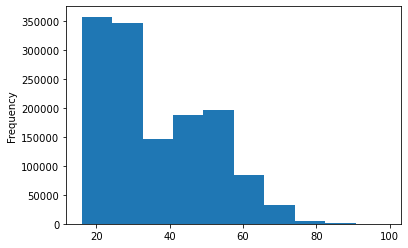

In [16]:
customer['age'].plot(kind='hist')

In [17]:
#filling null values for the age column with integer median value
customer['age'] = customer['age'].fillna(np.ceil(customer['age'].median()))

In [18]:
customer.isnull().sum()

customer_id               0
club_member_status        0
fashion_news_frequency    0
age                       0
postal_code               0
dtype: int64

In [19]:
customer.to_csv('customer_updated.csv')